In [30]:
import os
from openai import OpenAI
from pathlib import Path
import IPython

client = OpenAI(
  organization='org-key',
  project='proj_key',
)

In [31]:
NOVEL = "Cien Años de Soledad"
MODEL = "gpt-4o-mini"

In [32]:
def set_stream(message):
    return client.chat.completions.create(
        model=MODEL,
        messages=[{"role": "user", "content": message}],
        stream=True,
    )

def get_message(stream):
    message = ''
    
    for chunk in stream:
        if chunk.choices[0].delta.content is not None:
            message += chunk.choices[0].delta.content
            
    message += "\""

    return message

In [33]:
tweet = get_message(set_stream(f"Resume en el tamaño de un tweet la novela {NOVEL}"))

In [34]:
print(tweet)

"Cien años de soledad" narra la historia de la familia Buendía en el pueblo de Macondo, explorando temas de soledad, realismo mágico y el ciclo eterno del tiempo. A través de generaciones, se entrelazan amor, guerra y destino, reflejando la lucha de la humanidad. 📚✨ #GabrielGarcíaMárquez"


In [35]:
tweet_eng = get_message(set_stream(f"Traduce a inglés:{tweet}"))

In [36]:
print(tweet_eng)

“One Hundred Years of Solitude” tells the story of the Buendía family in the town of Macondo, exploring themes of solitude, magical realism, and the eternal cycle of time. Through generations, love, war, and destiny intertwine, reflecting the struggle of humanity. 📚✨ #GabrielGarcíaMárquez"


In [37]:
def create_mp3(filename):
    import openai

    speech_file_path = filename
    response = openai.audio.speech.create(
      model="tts-1",
      voice="alloy",
      input=tweet
    )
    response.stream_to_file(speech_file_path)

In [38]:
create_mp3(Path("esp.mp3"))

/tmp/ipykernel_3899/2121536738.py:10: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)


In [39]:
IPython.display.Audio("esp.mp3")

In [40]:
create_mp3(Path("eng.mp3"))

/tmp/ipykernel_3899/2121536738.py:10: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)


In [41]:
IPython.display.Audio("eng.mp3")

In [42]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def display_image_from_url(url, figsize=(10, 10)):
    """
    Downloads and displays an image from a URL in Jupyter notebook.
    
    Args:
        url (str): URL of the image
        figsize (tuple): Figure size in inches (width, height)
        
    Returns:
        None
    
    Raises:
        requests.exceptions.RequestException: If the URL request fails
        PIL.UnidentifiedImageError: If the image format is not supported
    """
    try:
        # Download image
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        
        # Convert to PIL Image
        img = Image.open(BytesIO(response.content))
        
        # Create figure with specified size
        plt.figure(figsize=figsize)
        
        # Remove axes for cleaner display
        plt.axis('off')
        
        # Display image
        plt.imshow(img)
        plt.show()
        
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
    except PIL.UnidentifiedImageError as e:
        print(f"Error processing image: {e}")
    finally:
        plt.close()

In [43]:
image = client.images.generate(
  model="dall-e-3",
  prompt=f"Genera una imagen inspirada en algún objeto simbólico de la novela {NOVEL}",
  n=1,
  size="1024x1024"
)

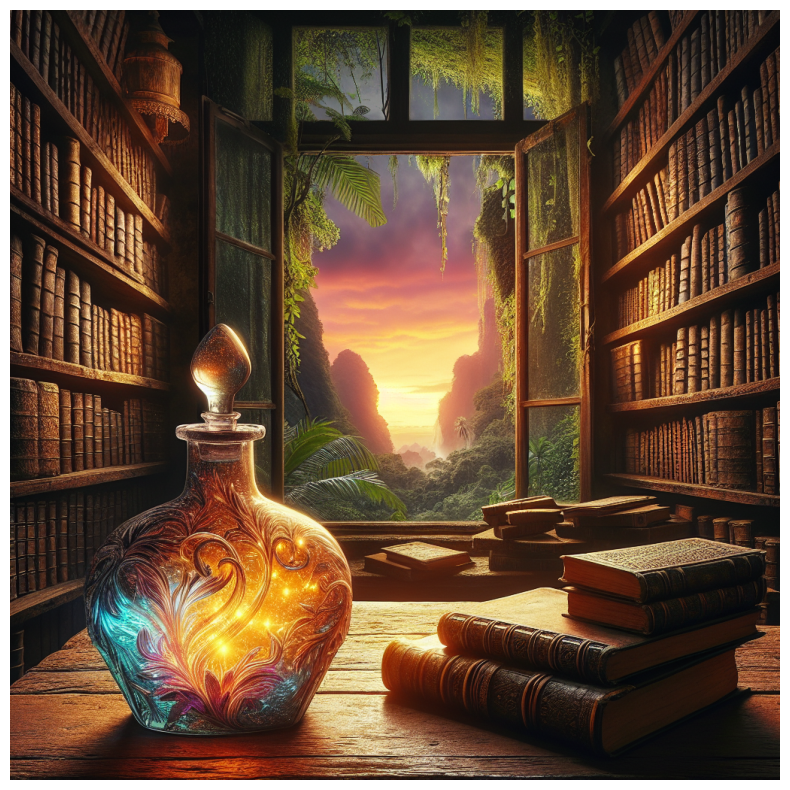

In [44]:
display_image_from_url(image.data[0].url)